In [13]:
import nltk

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/leonardoscholler/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/leonardoscholler/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/leonardoscholler/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/leonardoscholler/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/leonardoscholler/nltk_data...
[nltk_data]    |   Package basque_grammars is alread

True

In [14]:
texts = []

for i in range(1, 30):
    with open(f'../dados/generated_control/{i}.txt', 'r') as file:
        texts.append(file.read())

texts

["- I just finished a really good book, it was so captivating.\n- That's awesome! What was the book about?\n- It was a mystery thriller with a plot twist I never saw coming.\n- I love when books surprise me like that. It's such a good feeling.\n- Definitely, it keeps you on your toes. Have you read any good books lately?\n- Not recently, I've been so busy with work that I haven't had much time for reading.\n- I totally get that, sometimes life just gets in the way of our hobbies.\n- Yeah, but it's important to make time for things we enjoy too.\n- You're right, I need to prioritize some me-time soon.\n- You deserve it! What's something you like to do for yourself when you have free time?\n- I love going for long walks in nature, it really helps me clear my mind.\n- That sounds so relaxing. I should try that sometime.\n- You definitely should, it's so refreshing. Let me know if you want to join me sometime.\n- I'd love to, thanks for the invite. We should plan a walk soon.\n- Absolutely

In [15]:
processed_texts = []
for text in texts:
    split_text = text.split('===')[0].strip().split('\n')

    # Extracting alternating messages
    intrigue_messages = split_text[::2]
    peacemaker_messages = split_text[1::2]

    # Creating schema
    result = []
    for i in range(len(intrigue_messages)):
        result.append({
            "agent": "pessoa A",
            "message": intrigue_messages[i].replace('- ', '')
        })
        if i < len(peacemaker_messages):
            result.append({
                "agent": "pessoa B",
                "message": peacemaker_messages[i].replace('- ', '')
            })
    
    print(len(result))
    processed_texts.append(result[0:12])

processed_texts

18
21
14
13
14
14
13
16
12
14
16
13
13
13
12
17
15
12
13
15
12
13
15
16
13
16
13
12
17


[[{'agent': 'pessoa A',
   'message': 'I just finished a really good book, it was so captivating.'},
  {'agent': 'pessoa B', 'message': "That's awesome! What was the book about?"},
  {'agent': 'pessoa A',
   'message': 'It was a mystery thriller with a plot twist I never saw coming.'},
  {'agent': 'pessoa B',
   'message': "I love when books surprise me like that. It's such a good feeling."},
  {'agent': 'pessoa A',
   'message': 'Definitely, it keeps you on your toes. Have you read any good books lately?'},
  {'agent': 'pessoa B',
   'message': "Not recently, I've been so busy with work that I haven't had much time for reading."},
  {'agent': 'pessoa A',
   'message': 'I totally get that, sometimes life just gets in the way of our hobbies.'},
  {'agent': 'pessoa B',
   'message': "Yeah, but it's important to make time for things we enjoy too."},
  {'agent': 'pessoa A',
   'message': "You're right, I need to prioritize some me-time soon."},
  {'agent': 'pessoa B',
   'message': "You de

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

sid = SentimentIntensityAnalyzer()

for text in processed_texts:
    for message in text:

        tokens = word_tokenize(message['message'].lower())
        filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

        lemmatizer = WordNetLemmatizer()
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

        processed_text = ' '.join(lemmatized_tokens)
        message.update(sid.polarity_scores(processed_text))

processed_texts

[[{'agent': 'pessoa A',
   'message': 'I just finished a really good book, it was so captivating.',
   'neg': 0.0,
   'neu': 0.556,
   'pos': 0.444,
   'compound': 0.4927},
  {'agent': 'pessoa B',
   'message': "That's awesome! What was the book about?",
   'neg': 0.0,
   'neu': 0.313,
   'pos': 0.687,
   'compound': 0.6588},
  {'agent': 'pessoa A',
   'message': 'It was a mystery thriller with a plot twist I never saw coming.',
   'neg': 0.0,
   'neu': 0.811,
   'pos': 0.189,
   'compound': 0.1027},
  {'agent': 'pessoa B',
   'message': "I love when books surprise me like that. It's such a good feeling.",
   'neg': 0.0,
   'neu': 0.132,
   'pos': 0.868,
   'compound': 0.9042},
  {'agent': 'pessoa A',
   'message': 'Definitely, it keeps you on your toes. Have you read any good books lately?',
   'neg': 0.0,
   'neu': 0.472,
   'pos': 0.528,
   'compound': 0.6808},
  {'agent': 'pessoa B',
   'message': "Not recently, I've been so busy with work that I haven't had much time for reading."

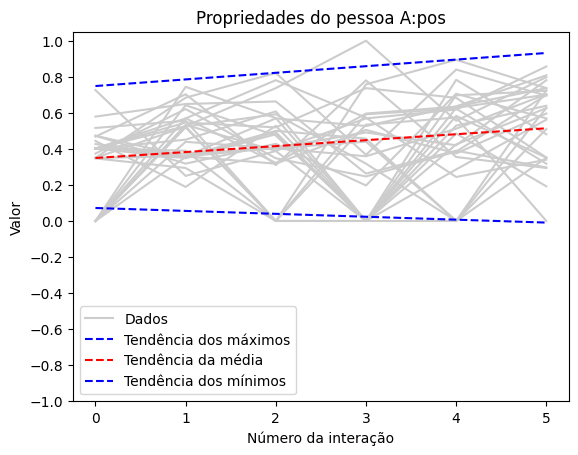

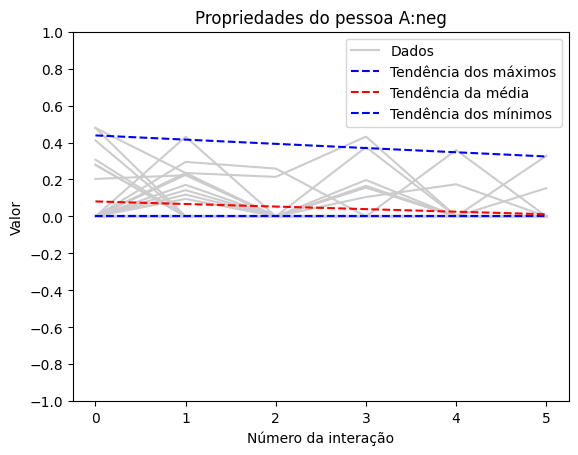

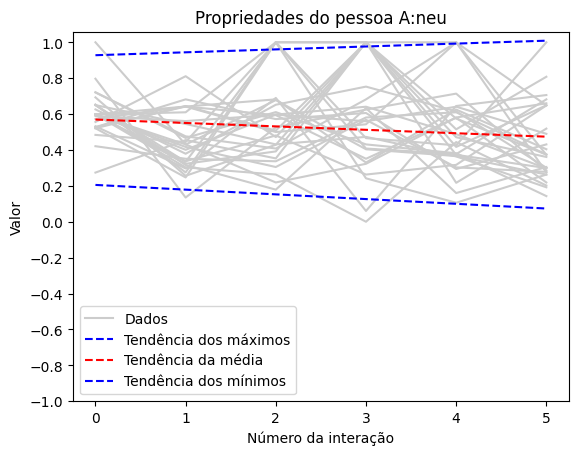

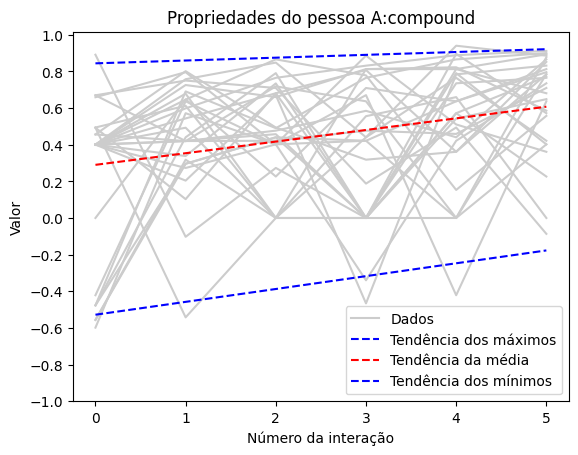

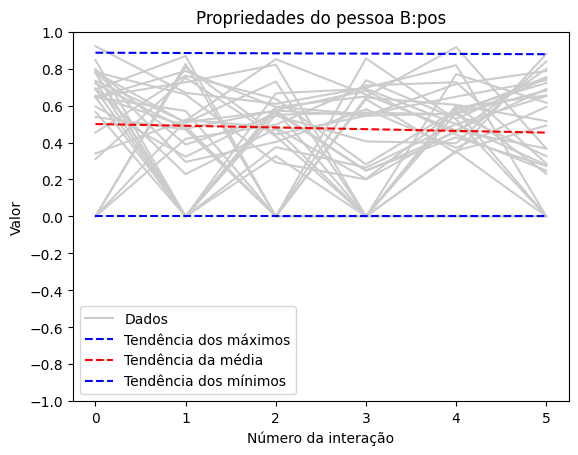

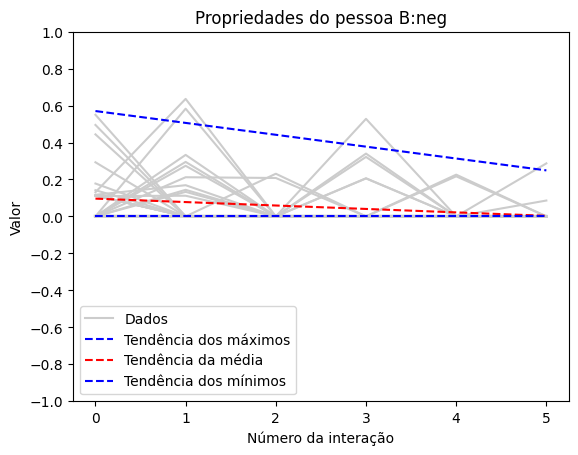

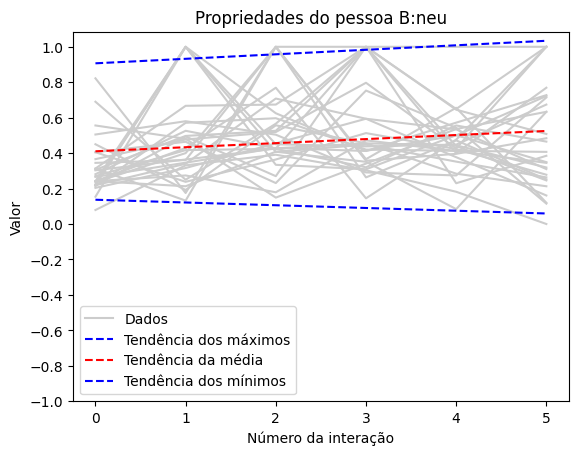

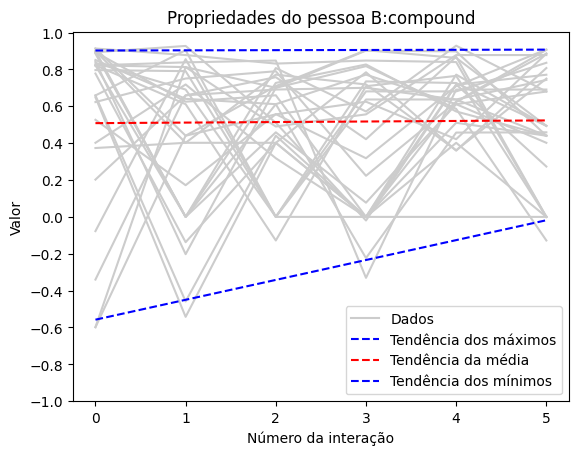

In [27]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np

compare = {}

for agent in ['pessoa A', 'pessoa B']:
    for category in ['pos', 'neg', 'neu', 'compound']:

        data = np.array([[d[category] for d in x if d['agent'] == agent] for x in processed_texts])
        for x in data:
            plt.plot(range(len(x)), x, '#ccc')
        data = data.T

        # x values are just indices
        x = np.arange(len(data))

        avg_y = np.mean(data, axis=1)
        min_y = np.min(data, axis=1)
        max_y = np.max(data, axis=1)

        # calculate polynomial fit (degree = 1 for linear)
        coef_avg = np.polyfit(x, avg_y, 1)
        coef_min = np.polyfit(x, min_y, 1)
        coef_max = np.polyfit(x, max_y, 1)

        poly1d_fn_avg = np.poly1d(coef_avg)
        poly1d_fn_min = np.poly1d(coef_min) 
        poly1d_fn_max = np.poly1d(coef_max)


        legends = [Line2D([0], [0], color='#ccc', label='Dados'),
                   Line2D([0], [0], color='blue', label='Tendência dos máximos', linestyle='--'),
                   Line2D([0], [0], color='red', label='Tendência da média', linestyle='--'),
                   Line2D([0], [0], color='blue', label='Tendência dos mínimos', linestyle='--'),
        ]

        plt.plot(x, poly1d_fn_avg(x), '--r')
        plt.plot(x, poly1d_fn_min(x), '--b')
        plt.plot(x, poly1d_fn_max(x), '--b')

        plt.yticks(np.arange(-1, 1.1, 0.2))

        plt.xlabel('Número da interação')
        plt.ylabel('Valor')
        plt.title(f'Propriedades do {agent}:{category}')
        plt.legend(handles=legends)
        plt.show()
        
        if category == 'compound':
            compare[agent] = {
                'avg': poly1d_fn_avg(x).tolist(),
                'min': poly1d_fn_min(x).tolist(),
                'max': poly1d_fn_max(x).tolist()
            }

In [28]:
compare

{'pessoa A': {'avg': [0.2900888341543512,
   0.3535268637110015,
   0.4169648932676518,
   0.4804029228243021,
   0.5438409523809524,
   0.6072789819376027],
  'min': [-0.5278714285714284,
   -0.457702857142857,
   -0.3875342857142856,
   -0.3173657142857142,
   -0.24719714285714278,
   -0.17702857142857137],
  'max': [0.8440095238095231,
   0.8594723809523803,
   0.8749352380952375,
   0.8903980952380948,
   0.9058609523809521,
   0.9213238095238093]},
 'pessoa B': {'avg': [0.5085748768472904,
   0.5115297536945811,
   0.5144846305418718,
   0.5174395073891624,
   0.5203943842364531,
   0.5233492610837438],
  'min': [-0.5576190476190473,
   -0.44972476190476174,
   -0.3418304761904761,
   -0.2339361904761904,
   -0.1260419047619048,
   -0.01814761904761919],
  'max': [0.9025904761904754,
   0.9035476190476184,
   0.9045047619047613,
   0.9054619047619042,
   0.9064190476190472,
   0.9073761904761902]}}